<a href="https://colab.research.google.com/github/haturusinghe/knn-wines-classifier/blob/main/Wine_Classifier_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSCI 31022

Machine Learning and Pattern Recognition

A/Y 2020/2021

Assignment 1

**Student Number : CS/2018/015**





This Jupyter Notebook file is available on : https://colab.research.google.com/drive/1GsTwR2ZXUxjZsj2cY1JcCy_OcXJSIkDO?usp=sharing

# Download the Wine dataset and load it into a Pandas dataframe

In [ ]:
import pandas as pd

# Download the Wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None)

# Rename the columns
df.columns = ['cultivar', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
              'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


df.head()

,cultivar,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,cultivar,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

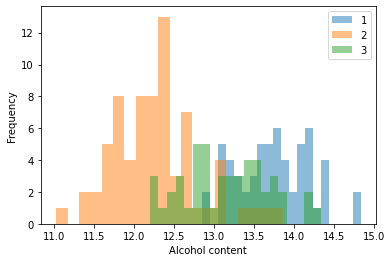

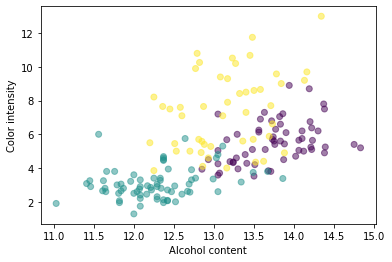

In [ ]:
# Plot the distribution of alcohol content for each cultivar
df.groupby('cultivar')['alcohol'].plot(kind='hist', alpha=0.5, bins=20)
plt.xlabel('Alcohol content')
plt.legend()
plt.show()

# Scatter plot of alcohol content vs. color intensity
plt.scatter(df['alcohol'], df['color_intensity'], c=df['cultivar'], alpha=0.5)
plt.xlabel('Alcohol content')
plt.ylabel('Color intensity')
plt.show()

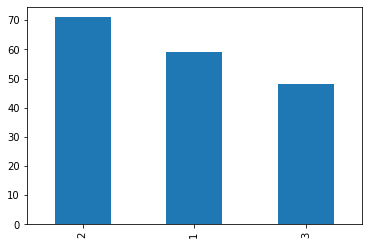

In [ ]:
freq=df['cultivar'].value_counts()
freq.plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

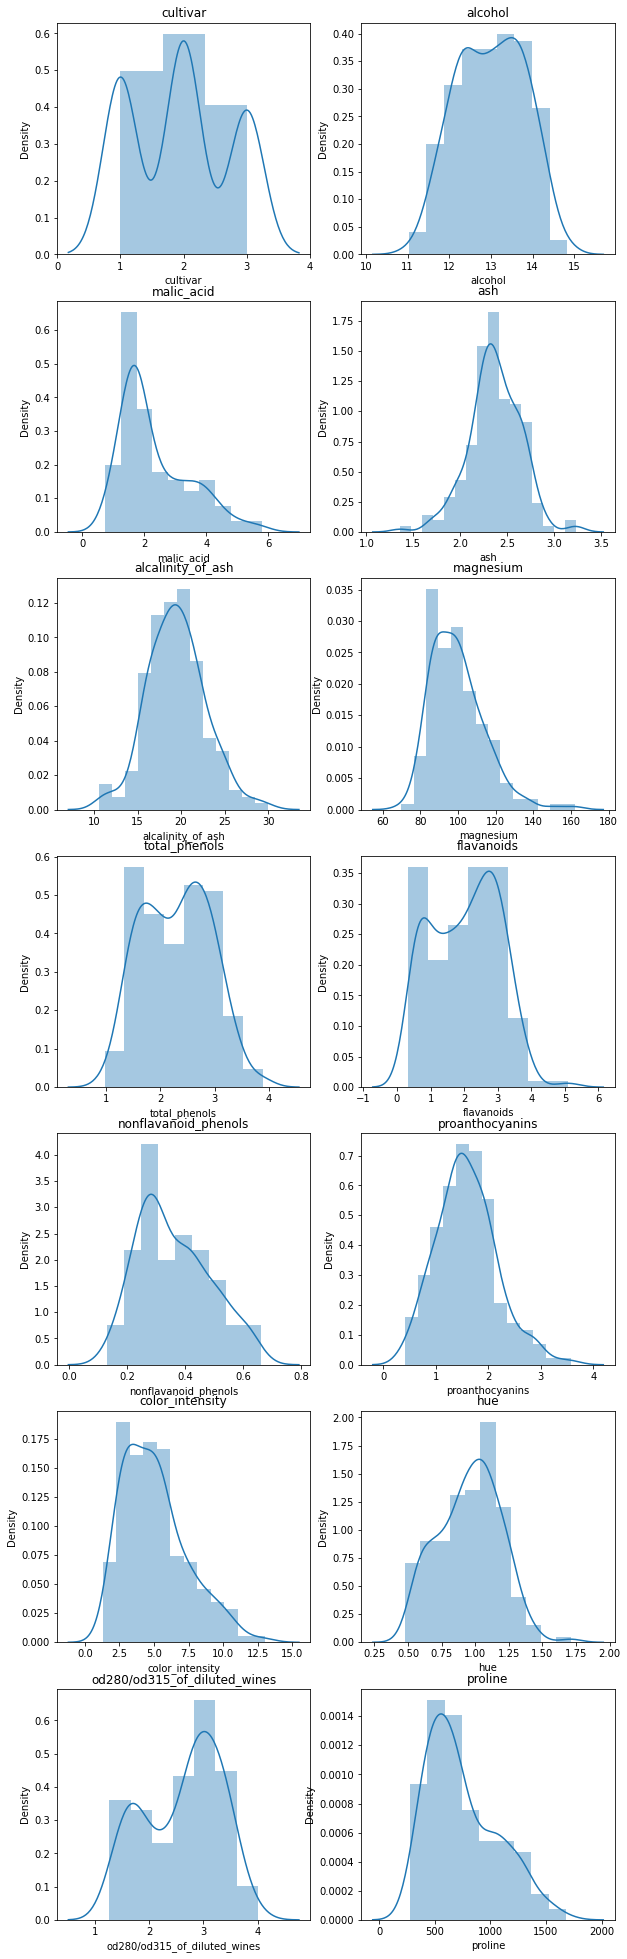

In [ ]:
# Set the figure size
plt.figure(figsize=(10,40))

# Iterate over each column
for i, col in enumerate(df.columns):
    # Create a subplot
    plt.subplot(8, 2, i+1)
    # Plot the distribution of the column using sns.distplot
    sns.distplot(df[col])
    # Add a title to the subplot
    plt.title(col)

# Show the plot
plt.show()

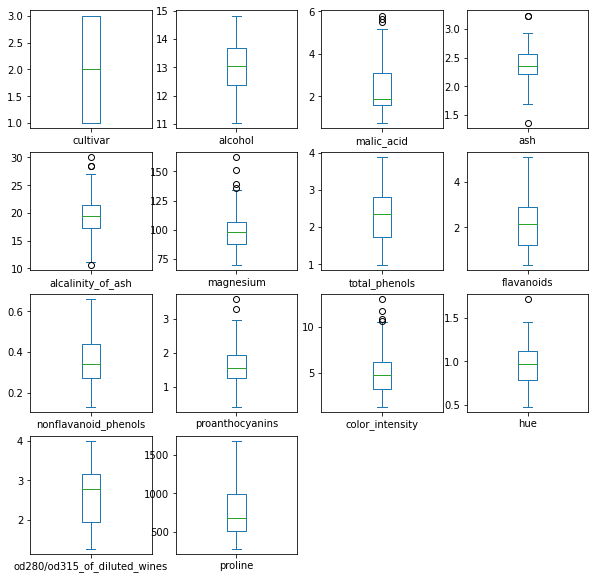

In [ ]:
# Plot the boxplot of each column
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10))

# Display the plot
plt.show()

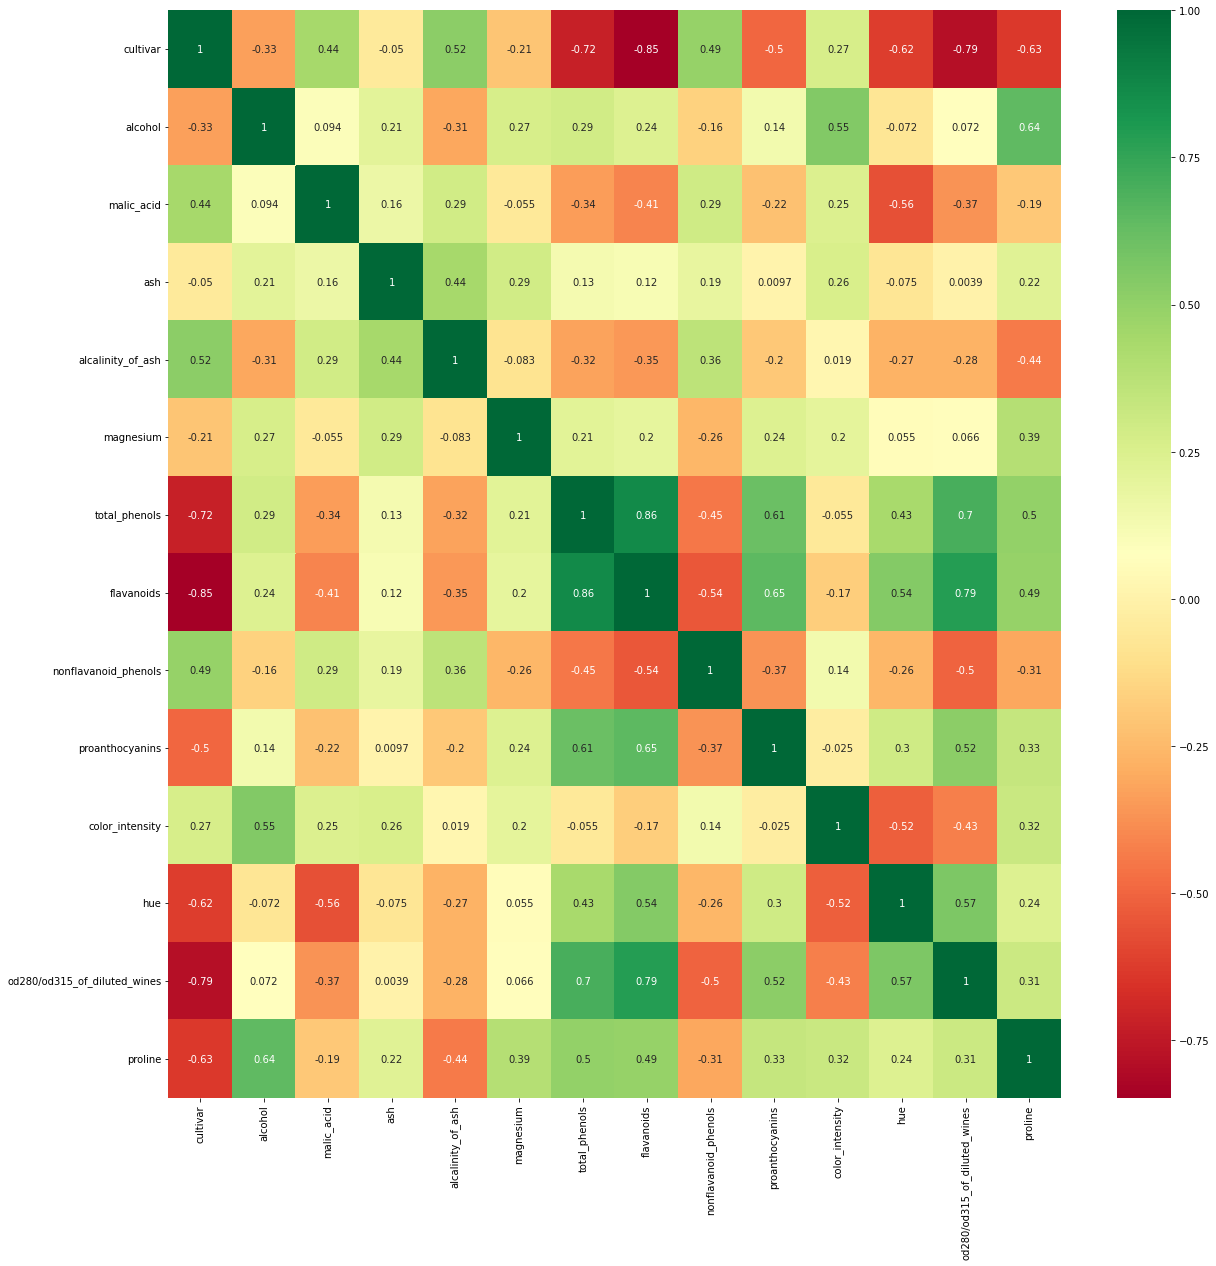

In [ ]:
plt.figure(figsize=(20,20))
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='RdYlGn')

# Show the plot
plt.show()

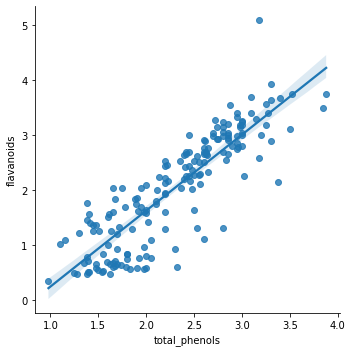

In [ ]:
sns.lmplot(x='total_phenols', y ='flavanoids', data=df, fit_reg=True);

# Data Preprosessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Check for missing values
print(df.isnull().sum())

cultivar                        0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [ ]:
# Separate the predictors and target variable
X = df.drop('cultivar', axis=1)
y = df['cultivar']

In [ ]:
# delete one of the correlating features
X = X.drop('total_phenols', axis=1)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Get the column names from the original DataFrame
column_names = df.drop(['cultivar','total_phenols'], axis=1).columns

# Create the DataFrame using the scaled data and the column names
scaled_df = pd.DataFrame(X_scaled, columns=column_names)

# View the DataFrame
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = X_reduced
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,-3.210072,-1.614534
1,-2.224695,0.197755
2,-2.302231,-1.116764
3,-2.908373,-2.799793
4,-0.673968,-0.844405


In [ ]:
# Join again the target variable

finalDf = pd.concat([principalDf, df[['cultivar']]], axis = 1)
finalDf.head()

,PC 1,PC 2,cultivar
0,-3.210072,-1.614534,1
1,-2.224695,0.197755,1
2,-2.302231,-1.116764,1
3,-2.908373,-2.799793,1
4,-0.673968,-0.844405,1


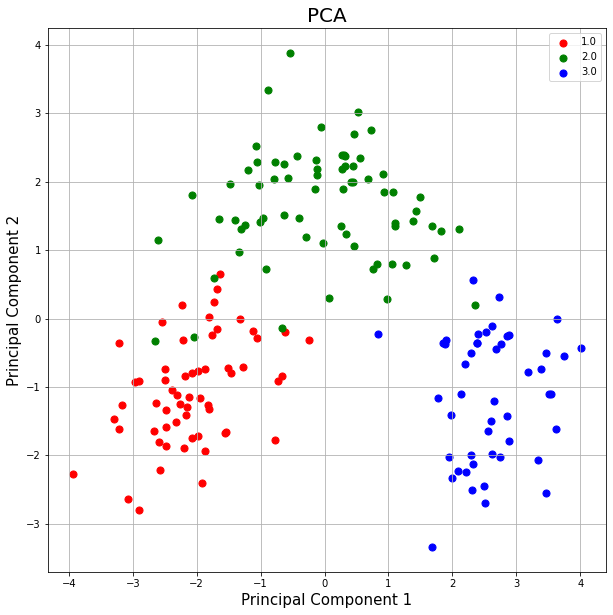

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [1.0, 2.0, 3.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cultivar'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Data Splitting to Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Alternatively, we can use the reduced data after PCA:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choose a value for the k parameter
k = 5

In [ ]:
# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

## On Reduced Data

In [ ]:
# Initialize the classifier
knn_red = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_red.fit(X_train_reduced, y_train_reduced)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
y_pred_reduced = knn_red.predict(X_test_reduced)

In [ ]:
print('score on training set:', knn_red.score(X_train_reduced, y_train_reduced))
print('score on test set:', knn_red.score(X_test_reduced, y_test_reduced))
print(metrics.classification_report(y_true=y_test_reduced, y_pred=y_pred_reduced))

score on training set: 0.9435483870967742
score on test set: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# Evaluate the classifier on the test data

In [ ]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print('score on training set:', knn.score(X_train, y_train))
print('score on test set:', knn.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

score on training set: 0.9758064516129032
score on test set: 0.9629629629629629
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9629629629629629
Precision: 0.9611111111111111
Recall: 0.9682539682539683


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


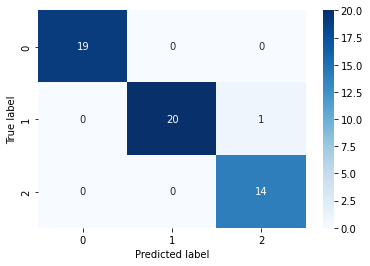

In [ ]:
# Create a confusion matrix plot using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Checking the results with Different values for k parameter

In [ ]:
import numpy as np

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 75)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

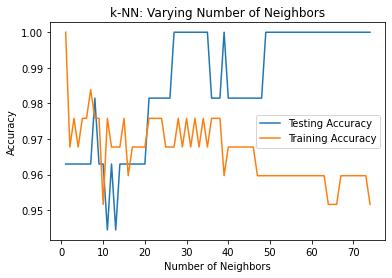

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()